   # Imarticus Learning - Capstone Project 1 
   ## Back Order Prediction

### Importing the required libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,6)
import warnings
warnings.simplefilter('ignore')

In [2]:
df1 = pd.read_csv('back_order.csv',low_memory=False)
df2 = pd.read_csv('back_order_test.csv',low_memory=False)

In [3]:
print('The training data shape :', df1.shape)
print('The test data shape :', df2.shape)

The training data shape : (1687861, 23)
The test data shape : (242076, 23)


In [3]:
#combining the train and test data
backorder_df = pd.concat([df1,df2])
print('The shape of the combined data :', backorder_df.shape)
print('Total Number of Instances :', backorder_df.shape[0])
print('Total Number of Attributes :', backorder_df.shape[1])

The shape of the combined data : (1929937, 23)
Total Number of Instances : 1929937
Total Number of Attributes : 23


In [5]:
backorder_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [6]:
backorder_df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data description

#### 1.  sku - Random ID for the product

#### 2.  national_inv - Current inventory level for the part

#### 3.  lead_time - Transit time for product (if available)

#### 4.  in_transit_qty - Amount of product in transit from source

#### 5.  forecast_3_month - Forecast sales for the next 3 months

#### 6.  forecast_6_month - Forecast sales for the next 6 months

#### 7.  forecast_9_month - Forecast sales for the next 9 months

#### 8.  sales_1_month - Sales quantity for the prior 1 month time period

#### 9.  sales_3_month - Sales quantity for the prior 3 month time period

#### 10. sales_6_month - Sales quantity for the prior 6 month time period

#### 11. sales_9_month - Sales quantity for the prior 9 month time period

#### 12. min_bank - Minimum recommend amount to stock

#### 13. potential_issue - Source issue for part identified

#### 14. pieces_past_due - Parts overdue from source

#### 15. perf_6_month_avg - Source performance for prior 6 month period

#### 16. perf_12_month_avg - Source performance for prior 12 month period

#### 17. local_bo_qty - Amount of stock orders overdue

#### 18. deck_risk - Part risk flag

#### 19. oe_constraint - Part risk flag

#### 20. ppap_risk - Part risk flag

#### 21. stop_auto_buy - Part risk flag

#### 22. rev_stop - Part risk flag

#### 23. went_on_backorder - Product actually went on backorder. This is the target value.

# Exploratory Data Analysis

In [7]:
backorder_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929937 entries, 0 to 242075
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                object 
 1   national_inv       float64
 2   lead_time          float64
 3   in_transit_qty     float64
 4   forecast_3_month   float64
 5   forecast_6_month   float64
 6   forecast_9_month   float64
 7   sales_1_month      float64
 8   sales_3_month      float64
 9   sales_6_month      float64
 10  sales_9_month      float64
 11  min_bank           float64
 12  potential_issue    object 
 13  pieces_past_due    float64
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       float64
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(15), object(8)
memory usage: 353.4+ MB


In [8]:
backorder_df.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1929935.0,496.568259,29573.434344,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1814318.0,7.878627,7.054212,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1929935.0,43.064397,1295.420493,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1929935.0,178.539864,5108.770174,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,1929935.0,345.465893,9831.562085,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1929935.0,506.606748,14345.430866,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1929935.0,55.368164,1884.377009,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1929935.0,174.663858,5188.855851,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1929935.0,341.565349,9585.030376,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1929935.0,523.577094,14733.265629,0.0,0.00,4.00,47.00,3205172.0


In [9]:
backorder_df.describe(include='object').T

,count,unique,top,freq
sku,1929937,1929937,1487411,1
potential_issue,1929935,2,No,1928946
deck_risk,1929935,2,No,1494482
oe_constraint,1929935,2,No,1929643
ppap_risk,1929935,2,No,1697383
stop_auto_buy,1929935,2,Yes,1859391
rev_stop,1929935,2,No,1929096
went_on_backorder,1929935,2,No,1915954


##  Checking whether the target variable is balanced or not

 ### since its a classification problem, it is important to check the target variable having balanced or imbalanced data

In [10]:
backorder_df['went_on_backorder'].value_counts()

No     1915954
Yes      13981
Name: went_on_backorder, dtype: int64

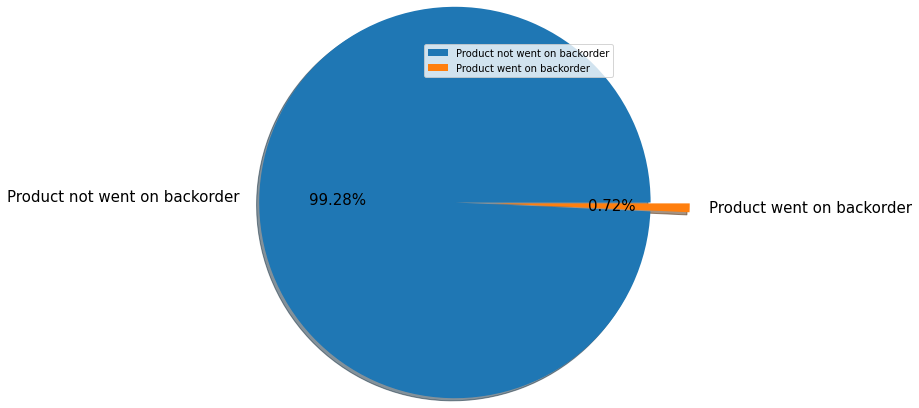

In [11]:
plt.pie(backorder_df['went_on_backorder'].value_counts(), autopct='%.2f%%',
        labels=['Product not went on backorder','Product went on backorder'], explode=[0,0.3],
        radius=1.5, shadow=True, textprops= {'fontsize' : 15})
plt.legend()
plt.show()

we can clearly see that only 0.7 % of products went for backorder.

Hence the data distribution is imbalanced.

It should be treated, or else it may create high bias.

It will be discussed when data preprocessing



## Missing value detection

In [12]:
missing_values = backorder_df.isna().sum()
missing_values_percentage = backorder_df.isna().sum()/backorder_df.isna().count()*100
missings = pd.concat([missing_values,missing_values_percentage], axis=1,keys=['Total', '%'])
missings

,Total,%
sku,0,0.000000
national_inv,2,0.000104
lead_time,115619,5.990817
in_transit_qty,2,0.000104
forecast_3_month,2,0.000104
forecast_6_month,2,0.000104
forecast_9_month,2,0.000104
sales_1_month,2,0.000104
sales_3_month,2,0.000104
sales_6_month,2,0.000104


There is 115619 values missing in the lead time feature.

Apart from lead time, every variables having only 2 missing values.

since the missing value percentage is lesser than 25 % in every variable, we cannot not drop any features.

The imputation for missing values will be discussed after eda

## Univariate Analysis

### Categorical features

   ###         1. sru

It is random Id provided for each products.

so, it is not having much significance for analysis and model building.

It will be ignored 

### 2. potential_issue

In [13]:
pd.crosstab(backorder_df['potential_issue'], backorder_df['went_on_backorder'])

went_on_backorder,No,Yes
potential_issue,,
No,1915019,13927
Yes,935,54


In [14]:
pd.crosstab(backorder_df['potential_issue'], backorder_df['went_on_backorder'])/backorder_df['potential_issue'].count() *100

went_on_backorder,No,Yes
potential_issue,,
No,99.227124,0.721631
Yes,0.048447,0.002798


###### When Potential issue ---> Yes
    
     The product went for backorder 54 times and its Percentage is 0.002798 %
     The product not went for backorder 935 times and its Percentage is 0.048447 %
     
###### When Potential issue ---> No 
 
     The product went for backorder 13927 times and its Percentage is 0.721631 %
     The product not went for backorder 1915019 times and its Percentage is 99.227124 %

###  3. deck_risk

In [15]:
pd.crosstab(backorder_df['deck_risk'], backorder_df['went_on_backorder'])

went_on_backorder,No,Yes
deck_risk,,
No,1482778,11704
Yes,433176,2277


In [16]:
pd.crosstab(backorder_df['deck_risk'], backorder_df['went_on_backorder'])/backorder_df['deck_risk'].count() *100

went_on_backorder,No,Yes
deck_risk,,
No,76.830463,0.606445
Yes,22.445108,0.117983


###### When deck_risk ---> Yes
    
     The product went for backorder 2277 times and its Percentage is 0.117983 %
     The product not went for backorder 433176 times and its Percentage is 22.445108 %
     
###### When deck_risk ---> No 
 
     The product went for backorder 11704 times and its Percentage is 0.6064451 %
     The product not went for backorder 1482778 times and its Percentage is 76.830463 %

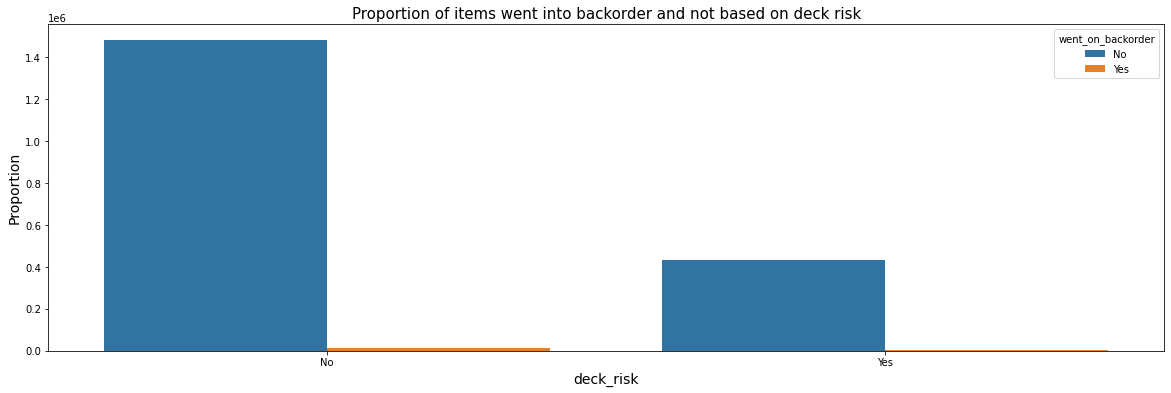

In [17]:
sns.countplot(backorder_df['deck_risk'], hue=backorder_df['went_on_backorder'])
plt.title('Proportion of items went into backorder and not based on deck risk', fontsize=15)
plt.xlabel('deck_risk', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.show()

### 4. oe_constraint	

In [18]:
pd.crosstab(backorder_df['oe_constraint'], backorder_df['went_on_backorder'])

went_on_backorder,No,Yes
oe_constraint,,
No,1915671,13972
Yes,283,9


In [19]:
pd.crosstab(backorder_df['oe_constraint'], backorder_df['went_on_backorder'])/backorder_df['oe_constraint'].count() *100

went_on_backorder,No,Yes
oe_constraint,,
No,99.260908,0.723962
Yes,0.014664,0.000466


###### When oe_constraint ---> Yes
    
     The product went for backorder 9 times and its Percentage is 0.000466 %
     The product not went for backorder 283 times and its Percentage is 0.014664 %
     
###### When oe_constraint ---> No 
 
     The product went for backorder 13972 times and its Percentage is 0.723962 %
     The product not went for backorder 1915671 times and its Percentage is 99.260908 %

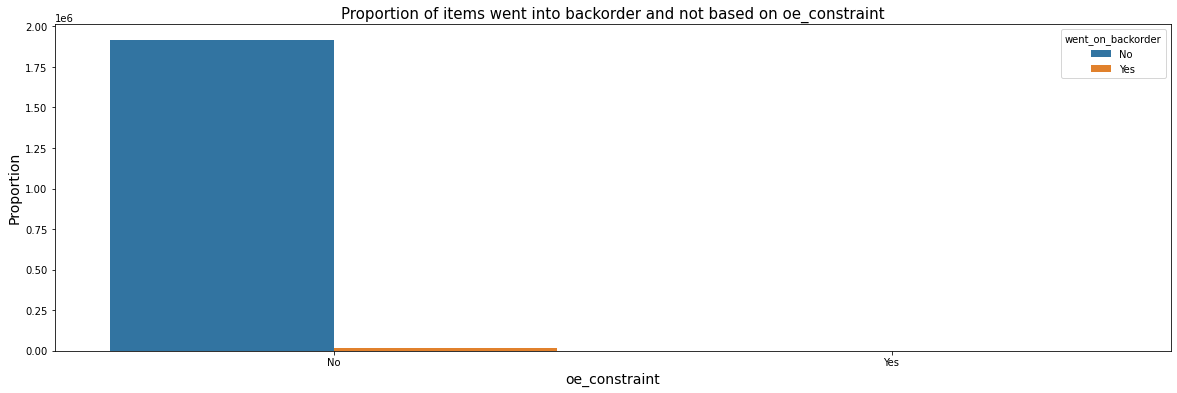

In [20]:
sns.countplot(backorder_df['oe_constraint'], hue=backorder_df['went_on_backorder'])
plt.title('Proportion of items went into backorder and not based on oe_constraint', fontsize=15)
plt.xlabel('oe_constraint', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.show()

### 5. ppap_risk

In [21]:
pd.crosstab(backorder_df['ppap_risk'], backorder_df['went_on_backorder'])

went_on_backorder,No,Yes
ppap_risk,,
No,1685533,11850
Yes,230421,2131


In [22]:
pd.crosstab(backorder_df['ppap_risk'], backorder_df['went_on_backorder'])/backorder_df['ppap_risk'].count() *100

went_on_backorder,No,Yes
ppap_risk,,
No,87.336257,0.614010
Yes,11.939314,0.110418


###### When ppap_risk ---> Yes
    
     The product went for backorder 2131 times and its Percentage is 0.110418 %
     The product not went for backorder 230421 times and its Percentage is 11.939314 %
     
###### When ppap_risk ---> No 
 
     The product went for backorder 11850 times and its Percentage is 0.614010 %
     The product not went for backorder 1685533 times and its Percentage is 87.336257 %

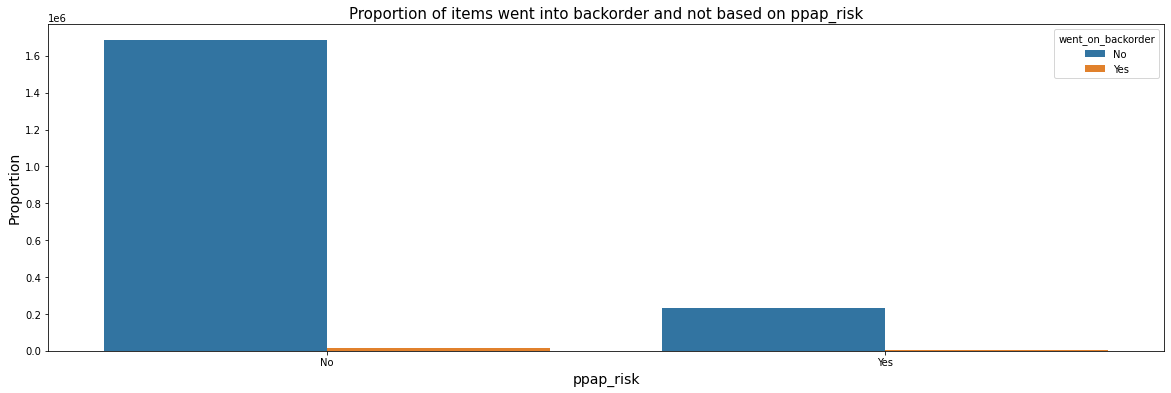

In [23]:
sns.countplot(backorder_df['ppap_risk'], hue=backorder_df['went_on_backorder'])
plt.title('Proportion of items went into backorder and not based on ppap_risk', fontsize=15)
plt.xlabel('ppap_risk', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.show()

### 6. stop_auto_buy

In [24]:
pd.crosstab(backorder_df['stop_auto_buy'], backorder_df['went_on_backorder'])

went_on_backorder,No,Yes
stop_auto_buy,,
No,69966,578
Yes,1845988,13403


In [25]:
pd.crosstab(backorder_df['stop_auto_buy'], backorder_df['went_on_backorder'])/backorder_df['stop_auto_buy'].count() *100

went_on_backorder,No,Yes
stop_auto_buy,,
No,3.625303,0.029949
Yes,95.650268,0.694479


###### When stop_auto_buy ---> Yes
    
     The product went for backorder 13403 times and its Percentage is 0.694479 %
     The product not went for backorder 1845988 times and its Percentage is 95.650268 %
     
###### When stop_auto_buy ---> No 
 
     The product went for backorder 578 times and its Percentage is 0.029949 %
     The product not went for backorder 69966 times and its Percentage is 3.625303 %

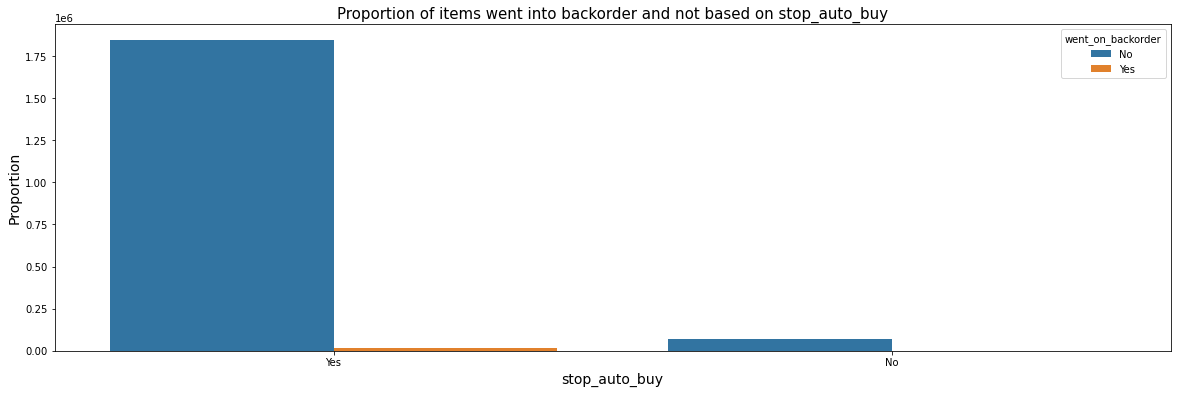

In [26]:
sns.countplot(backorder_df['stop_auto_buy'], hue=backorder_df['went_on_backorder'])
plt.title('Proportion of items went into backorder and not based on stop_auto_buy', fontsize=15)
plt.xlabel('stop_auto_buy', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.show()

### 7. rev_stop

In [27]:
pd.crosstab(backorder_df['rev_stop'], backorder_df['went_on_backorder'])

went_on_backorder,No,Yes
rev_stop,,
No,1915119,13977
Yes,835,4


In [28]:
pd.crosstab(backorder_df['rev_stop'], backorder_df['went_on_backorder'])/backorder_df['rev_stop'].count() *100

went_on_backorder,No,Yes
rev_stop,,
No,99.232306,0.724221
Yes,0.043266,0.000207


###### When rev_stop ---> Yes
    
     The product went for backorder 4 times and its Percentage is 0.000207 %
     The product not went for backorder 835 times and its Percentage is 0.043266 %
     
###### When rev_stop ---> No 
 
     The product went for backorder 13977 times and its Percentage is 0.724221 %
     The product not went for backorder 1915119 times and its Percentage is 99.232306 %

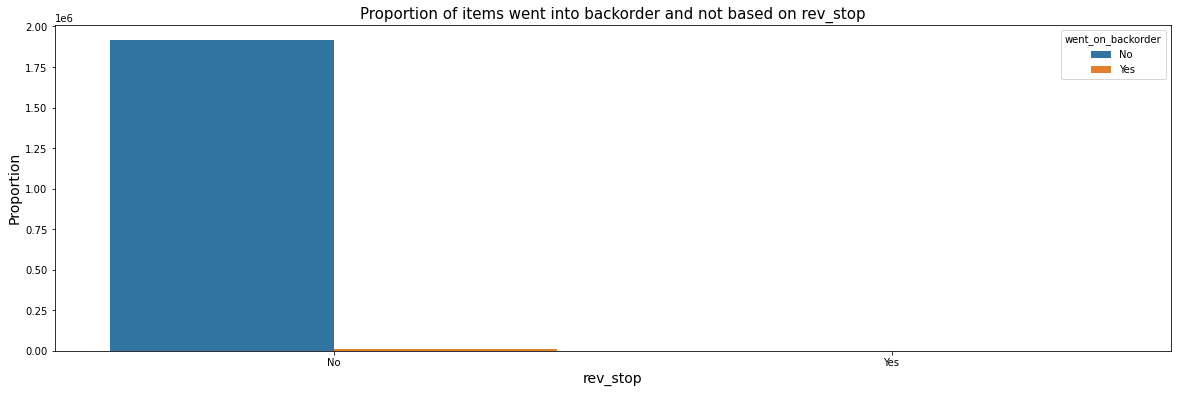

In [29]:
sns.countplot(backorder_df['rev_stop'], hue=backorder_df['went_on_backorder'])
plt.title('Proportion of items went into backorder and not based on rev_stop', fontsize=15)
plt.xlabel('rev_stop', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.show()

### Distribution of some numuric variables

In [30]:
backorder_df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

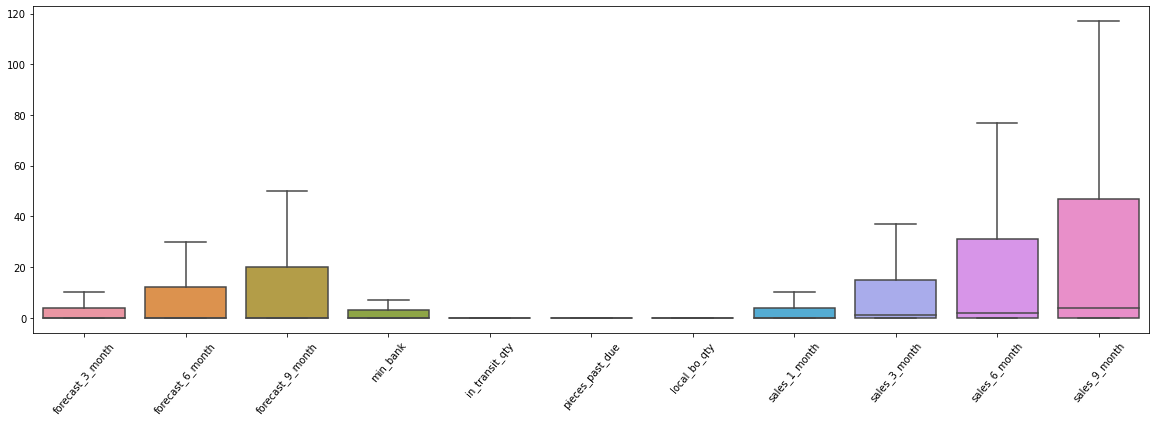

In [31]:
sns.boxplot(data=backorder_df[['forecast_3_month', 'forecast_6_month', 'forecast_9_month','min_bank','in_transit_qty',
       'pieces_past_due','local_bo_qty','sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']],showfliers= False)

plt.xticks(rotation=50)
plt.show()

from the above graph, we can clearly see that how the distribution of one feature varies from one another



### lets analysis each numeric feature one by one

###  national_inv

In [32]:
backorder_df[['national_inv','went_on_backorder']].groupby('went_on_backorder').sum()

,national_inv
went_on_backorder,
No,958047137.0
Yes,297325.0


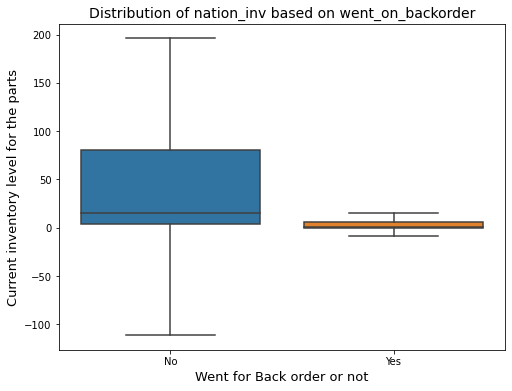

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(backorder_df['went_on_backorder'],backorder_df['national_inv'], showfliers=False)
plt.title('Distribution of nation_inv based on went_on_backorder', fontsize=14)
plt.xlabel('Went for Back order or not', fontsize=13)
plt.ylabel('Current inventory level for the parts', fontsize=13)
plt.show()

The feature national_inv shows the current inventory level for the parts.

Negative values indicates that the items which were available in warehouse, but not registered in a record.
Usually it occurs in a buisness.

Hence the negative values in the feature has a meaning, it will be kept and not be ignored.

Also, from the boxplot, we can see that items went for backorder initiated from 0



### lead_time

In [34]:
backorder_df[['lead_time']].value_counts()


lead_time
8.0          780719
2.0          384319
12.0         228997
4.0          147045
9.0          141423
52.0          34418
3.0           18602
10.0          16248
0.0           12026
14.0          11820
16.0          10132
13.0           6160
6.0            5826
5.0            4609
15.0           4355
17.0           4300
11.0           1246
20.0            477
30.0            356
18.0            253
7.0             239
22.0            152
24.0            148
26.0            120
28.0             96
21.0             56
40.0             56
35.0             40
19.0             32
1.0              24
23.0             16
25.0              8
dtype: int64

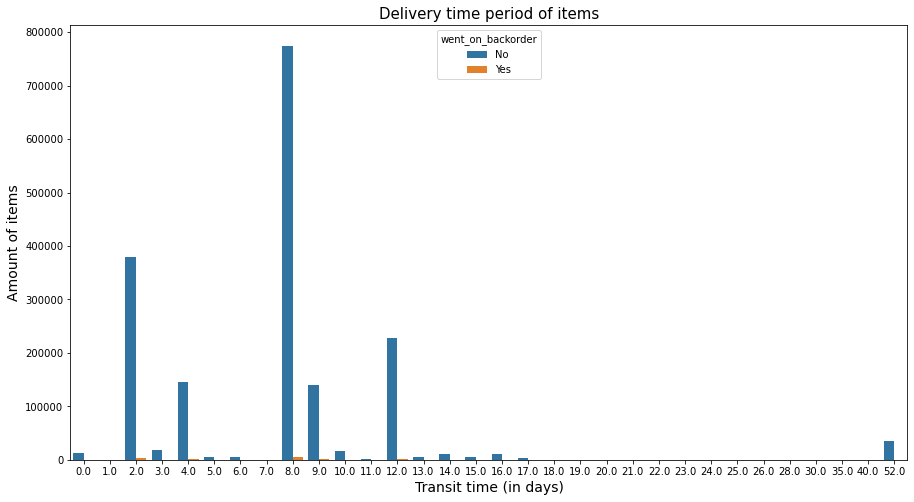

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(backorder_df['lead_time'], hue=backorder_df['went_on_backorder'])
plt.title('Delivery time period of items', fontsize=15)
plt.xlabel('Transit time (in days)',fontsize=14)
plt.ylabel('Amount of items',fontsize=14)
plt.show()

The feature lead_time showing the transit time for the items.

from the above plot, we can understand that the items had transit time below 13 days had more sales

Also, the items went for backorder had transit time below 13 days was greater than transit time above 13

### in_transit_qty

in_transit_qty is for the amount of products in transit from the source.

Most of the data in this features are zero.

so, we can use quantite value to analysis this feature

In [36]:
for i in range(10):
    quantite_values = backorder_df['in_transit_qty'].quantile((i*10)/100)
    print(i*10,'th percentile :', quantite_values)
   

0 th percentile : 0.0
10 th percentile : 0.0
20 th percentile : 0.0
30 th percentile : 0.0
40 th percentile : 0.0
50 th percentile : 0.0
60 th percentile : 0.0
70 th percentile : 0.0
80 th percentile : 1.0
90 th percentile : 15.0


In [37]:
for i in range(11):
    quantite_values= backorder_df['in_transit_qty'].quantile((i+90)/100)
    print(i+90,'th percentile :', quantite_values)

90 th percentile : 15.0
91 th percentile : 20.0
92 th percentile : 26.0
93 th percentile : 35.0
94 th percentile : 48.0
95 th percentile : 66.0
96 th percentile : 96.0
97 th percentile : 145.0
98 th percentile : 250.0
99 th percentile : 565.0
100 th percentile : 489408.0


Here, 70 % of the data in this feature are having zero value.

And, 99 % of the data in this feature are having values less than 565.

### forecast sales for 3, 6 and 9 month 

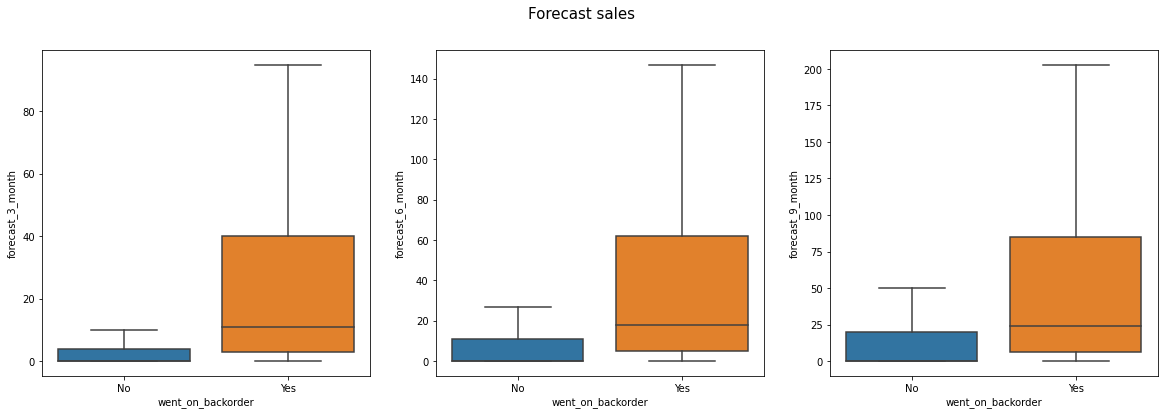

In [38]:
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

fig.suptitle('Forecast sales', fontsize=15)

sns.boxplot(backorder_df['went_on_backorder'],backorder_df['forecast_3_month'], showfliers= False, ax=ax1)

sns.boxplot(backorder_df['went_on_backorder'], backorder_df['forecast_6_month'], showfliers=False, ax=ax2)

sns.boxplot(backorder_df['went_on_backorder'], backorder_df['forecast_9_month'], showfliers=False, ax=ax3)
plt.show()

from the boxplot we can seen that the forecast sales of 3,6,9 months are higher in case of products went on backorder
compare to products not went on backorder

##### Now, we can check the correlation among them 

if they are highly correlated, we will kept one and drops others

In [39]:
corr=backorder_df[['forecast_3_month','forecast_6_month', 'forecast_9_month']].corr()
corr.style.background_gradient(cmap='RdBu')

,forecast_3_month,forecast_6_month,forecast_9_month
forecast_3_month,1.000000,0.988112,0.971443
forecast_6_month,0.988112,1.000000,0.994281
forecast_9_month,0.971443,0.994281,1.000000


from the correlation matrix of forecast sales, it can be seen that they are highly correlated.

it will be discussed during preprocessing

### sales quantity for 1, 3, 6 and 9 month

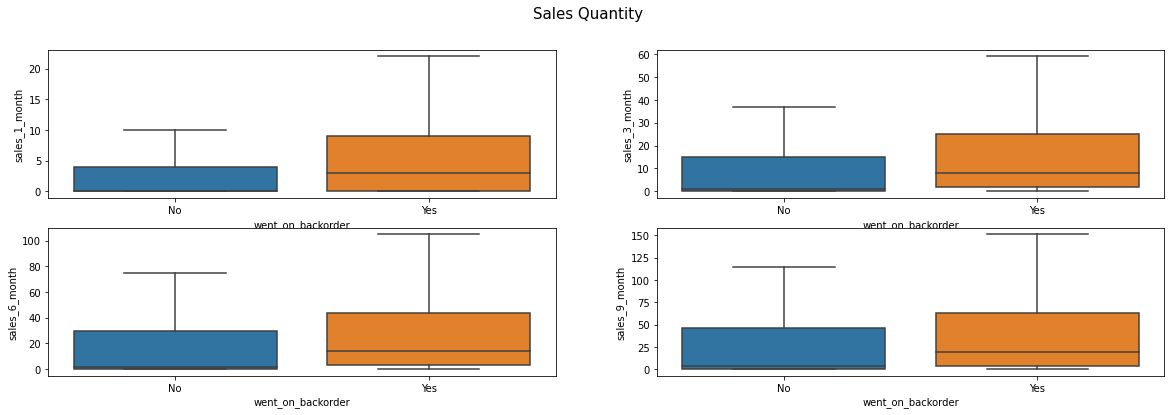

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

fig.suptitle('Sales Quantity', fontsize=15)
sns.boxplot(backorder_df['went_on_backorder'],backorder_df['sales_1_month'], showfliers= False,ax=ax1)

sns.boxplot(backorder_df['went_on_backorder'],backorder_df['sales_3_month'], showfliers= False, ax=ax2)

sns.boxplot(backorder_df['went_on_backorder'],backorder_df['sales_6_month'], showfliers= False, ax= ax3)
    
sns.boxplot(backorder_df['went_on_backorder'],backorder_df['sales_9_month'], showfliers= False, ax=ax4)

plt.show()

from the above boxplot, it can be observed that sales quantity are higher in case of product went on backorder

##### correlation between them

In [41]:
corr=backorder_df[['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']].corr()
corr.style.background_gradient(cmap='RdBu')

,sales_1_month,sales_3_month,sales_6_month,sales_9_month
sales_1_month,1.000000,0.918282,0.873111,0.824634
sales_3_month,0.918282,1.000000,0.975437,0.930531
sales_6_month,0.873111,0.975437,1.000000,0.973871
sales_9_month,0.824634,0.930531,0.973871,1.000000


Its also highly correlated

And it will be discussed later

### min_bank

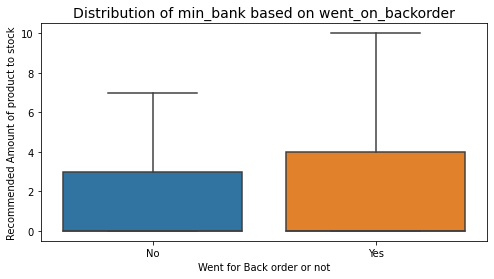

In [42]:
plt.figure(figsize=(8,4))
sns.boxplot(backorder_df['went_on_backorder'],backorder_df['min_bank'], showfliers=False)
plt.title('Distribution of min_bank based on went_on_backorder', fontsize=14)
plt.xlabel('Went for Back order or not', fontsize=10)
plt.ylabel('Recommended Amount of product to stock', fontsize=10)
plt.show()

from the above boxplot, we can observed that the data is highly overlaped for both labels.

But, we can understand that the majority of recommended stock went for backorder.

### pieces_past_due

since the most of the data in this feature having a zero value, it can be analysed by quantile values

In [43]:
for i in range(11):
    print(i*10,'th percentile:', backorder_df['pieces_past_due'].quantile((i*10)/100))

0 th percentile: 0.0
10 th percentile: 0.0
20 th percentile: 0.0
30 th percentile: 0.0
40 th percentile: 0.0
50 th percentile: 0.0
60 th percentile: 0.0
70 th percentile: 0.0
80 th percentile: 0.0
90 th percentile: 0.0
100 th percentile: 146496.0


In [44]:
for i in range(11):
    print(i+90,'th percentile:', backorder_df['pieces_past_due'].quantile((i+90)/100))

90 th percentile: 0.0
91 th percentile: 0.0
92 th percentile: 0.0
93 th percentile: 0.0
94 th percentile: 0.0
95 th percentile: 0.0
96 th percentile: 0.0
97 th percentile: 0.0
98 th percentile: 0.0
99 th percentile: 4.0
100 th percentile: 146496.0


In [45]:
for i in range(11):
    print((i+990)/10,'th percentile:', backorder_df['pieces_past_due'].quantile((i+990)/1000))

99.0 th percentile: 4.0
99.1 th percentile: 6.0
99.2 th percentile: 9.0
99.3 th percentile: 12.0
99.4 th percentile: 17.0
99.5 th percentile: 24.0
99.6 th percentile: 36.0
99.7 th percentile: 56.0
99.8 th percentile: 100.0
99.9 th percentile: 240.0
100.0 th percentile: 146496.0


Pieces_past_due is for parts overdue from the source.

The 98 % of data in this feature having zero value. so, it may be ignored



### Performance of the source for 6 and 12 month period

In [46]:
backorder_df[['perf_6_month_avg']].value_counts()

perf_6_month_avg
 0.99               163323
 1.00               150339
-99.00              148579
 0.73               128818
 0.98                97390
                     ...  
 0.20                  921
 0.03                  829
 0.04                  724
 0.01                  648
 0.29                  572
Length: 102, dtype: int64

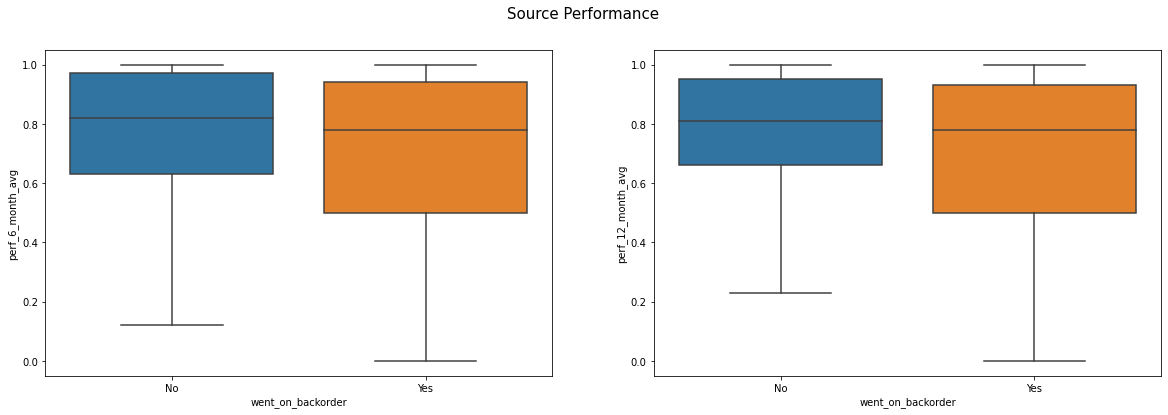

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


fig.suptitle('Source Performance ', fontsize=15)
sns.boxplot(backorder_df['went_on_backorder'],backorder_df['perf_6_month_avg'], showfliers= False,ax=ax1)

sns.boxplot(backorder_df['went_on_backorder'],backorder_df['perf_12_month_avg'], showfliers= False, ax=ax2)

plt.show()

from the above value counts and boxplot, we can observed that the majarity of data in the range of 0 to 1

And only less than 10 % of values in the negative.

we can assume that minimum values are poor performance and maximum values are good performance.

And majority of good performed source had higher products went on backorder

###### correlation between them

In [48]:
corr=backorder_df[['perf_6_month_avg','perf_12_month_avg']].corr()
corr.style.background_gradient(cmap='RdBu')

,perf_6_month_avg,perf_12_month_avg
perf_6_month_avg,1.000000,0.968690
perf_12_month_avg,0.968690,1.000000


Its also highly correlated

### local_bo_qty

This varible also contain most of the values zero, so lets analyse using quantile values

In [49]:
for i in range(11):
    print(i*10,'th percentile:', backorder_df['local_bo_qty'].quantile((i*10)/100))

0 th percentile: 0.0
10 th percentile: 0.0
20 th percentile: 0.0
30 th percentile: 0.0
40 th percentile: 0.0
50 th percentile: 0.0
60 th percentile: 0.0
70 th percentile: 0.0
80 th percentile: 0.0
90 th percentile: 0.0
100 th percentile: 12530.0


In [50]:
for i in range(11):
    print(i+90,'th percentile :', backorder_df['local_bo_qty'].quantile((i+90)/100))

90 th percentile : 0.0
91 th percentile : 0.0
92 th percentile : 0.0
93 th percentile : 0.0
94 th percentile : 0.0
95 th percentile : 0.0
96 th percentile : 0.0
97 th percentile : 0.0
98 th percentile : 0.0
99 th percentile : 1.0
100 th percentile : 12530.0


In [51]:
for i in range(11):
    print((i+990)/10,'th percentile :', backorder_df['local_bo_qty'].quantile((i+990)/1000))

99.0 th percentile : 1.0
99.1 th percentile : 2.0
99.2 th percentile : 2.0
99.3 th percentile : 3.0
99.4 th percentile : 4.0
99.5 th percentile : 7.0
99.6 th percentile : 10.0
99.7 th percentile : 18.0
99.8 th percentile : 35.0
99.9 th percentile : 99.0
100.0 th percentile : 12530.0


local_bo_qty is for Amount of stock orders overdue.

98 % of data in this feature having zero value.

so, it may be ignored



### Bivariate Analysis

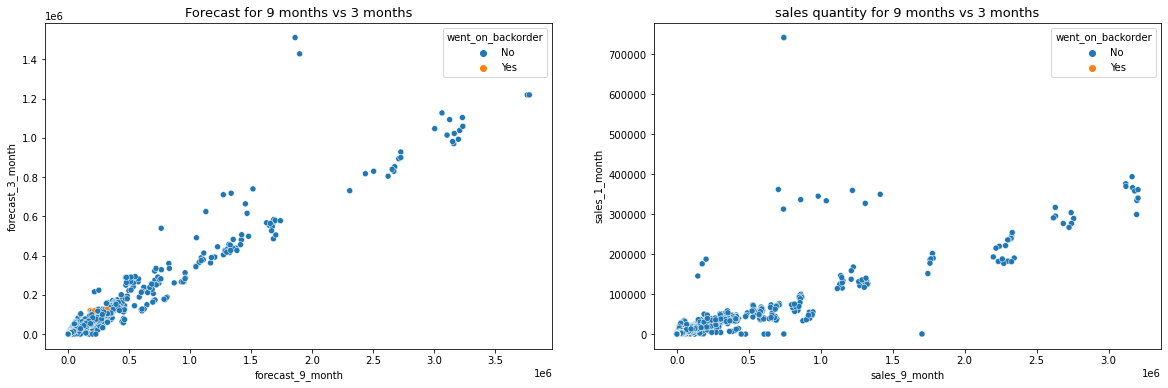

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.scatterplot(backorder_df['forecast_9_month'],backorder_df['forecast_3_month'],hue=backorder_df['went_on_backorder'],ax=ax1)
ax1.set_title('Forecast for 9 months vs 3 months',fontsize=13)

sns.scatterplot(backorder_df['sales_9_month'], backorder_df['sales_1_month'], ax=ax2,hue=backorder_df['went_on_backorder'])
ax2.set_title('sales quantity for 9 months vs 3 months',fontsize=13)

plt.show()

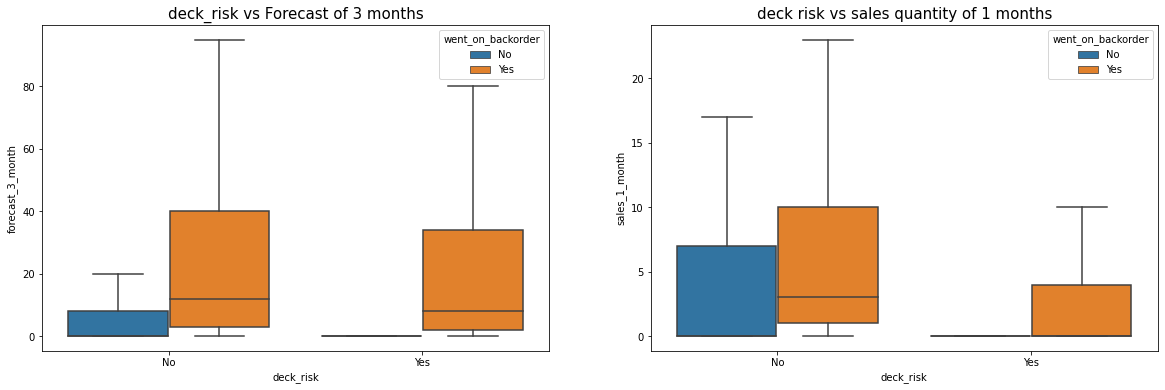

In [53]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.boxplot(backorder_df['deck_risk'],backorder_df['forecast_3_month'],hue=backorder_df['went_on_backorder'],
            ax=ax1,showfliers=False)
ax1.set_title('deck_risk vs Forecast of 3 months',fontsize=15)

sns.boxplot(backorder_df['deck_risk'], backorder_df['sales_1_month'], ax=ax2,hue=backorder_df['went_on_backorder'],
            showfliers=False)
ax2.set_title('deck risk vs sales quantity of 1 months',fontsize=15)

plt.show()

deck_risk is the one of the part risk flag 

forecast of 3 months and sales quantity of 1 month are higher in case of absence of part risk than the presence of part risk.

Also the product without part risk having maximum product went for back order

### Multivariate Analysis

In [54]:
backorder_df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

<Figure size 1440x432 with 0 Axes>

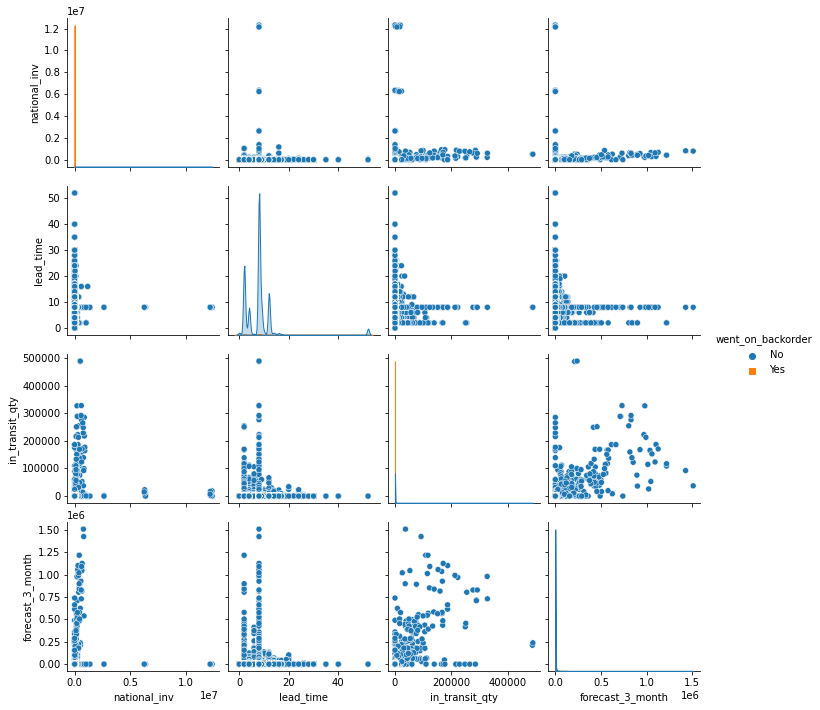

In [69]:
plt.figure()
cols_to_plot = backorder_df.columns[1:5].tolist() + ['went_on_backorder'] # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(backorder_df[cols_to_plot], hue ="went_on_backorder", markers=["o", "s"])
plt.show()

from the above scatter plot we can analyse the relation of one with one another

Data are highly overlapped and its hard to classify using above plot

### Data Preprocessing

### 1. Missing value imputation

Hence the features in the data does not contains  missing value grater than 25 %, we are not removing any of them.

The data is highly skewed in every numeric feature. so, the mean imputation is not a correct thing here.

So that we can impute the missing values with that features median value.

And for categorical features we can impute with that features mode value.

In [4]:
## median imputing for numeric features
backorder_df.national_inv = backorder_df['national_inv'].fillna(backorder_df['national_inv'].median())
backorder_df.lead_time = backorder_df['lead_time'].fillna(backorder_df['lead_time'].median())
backorder_df.in_transit_qty = backorder_df['in_transit_qty'].fillna(backorder_df['in_transit_qty'].median())
backorder_df.forecast_3_month = backorder_df['forecast_3_month'].fillna(backorder_df['forecast_3_month'].median())
backorder_df.forecast_6_month = backorder_df['forecast_6_month'].fillna(backorder_df['forecast_6_month'].median())
backorder_df.forecast_9_month = backorder_df['forecast_9_month'].fillna(backorder_df['forecast_9_month'].median())
backorder_df.sales_1_month = backorder_df['sales_1_month'].fillna(backorder_df['sales_1_month'].median())
backorder_df.sales_3_month = backorder_df['sales_3_month'].fillna(backorder_df['sales_3_month'].median())
backorder_df.sales_6_month = backorder_df['sales_6_month'].fillna(backorder_df['sales_6_month'].median())
backorder_df.sales_9_month = backorder_df['sales_9_month'].fillna(backorder_df['sales_9_month'].median())
backorder_df.min_bank = backorder_df['min_bank'].fillna(backorder_df['min_bank'].median())
backorder_df.pieces_past_due = backorder_df['pieces_past_due'].fillna(backorder_df['pieces_past_due'].median())
backorder_df.perf_6_month_avg = backorder_df['perf_6_month_avg'].fillna(backorder_df['perf_6_month_avg'].median())
backorder_df.perf_12_month_avg = backorder_df['perf_12_month_avg'].fillna(backorder_df['perf_12_month_avg'].median())
backorder_df.local_bo_qty = backorder_df['local_bo_qty'].fillna(backorder_df['local_bo_qty'].median())

In [5]:
## filling mode value for categorical feature
backorder_df.potential_issue = backorder_df['potential_issue'].fillna(backorder_df['potential_issue'].mode()[0])
backorder_df.deck_risk = backorder_df['deck_risk'].fillna(backorder_df['deck_risk'].mode()[0])
backorder_df.oe_constraint = backorder_df['oe_constraint'].fillna(backorder_df['oe_constraint'].mode()[0])
backorder_df.ppap_risk = backorder_df['ppap_risk'].fillna(backorder_df['ppap_risk'].mode()[0])
backorder_df.stop_auto_buy = backorder_df['stop_auto_buy'].fillna(backorder_df['stop_auto_buy'].mode()[0])
backorder_df.rev_stop = backorder_df['rev_stop'].fillna(backorder_df['rev_stop'].mode()[0])
backorder_df.went_on_backorder = backorder_df['went_on_backorder'].fillna(backorder_df['went_on_backorder'].mode()[0])


In [6]:
missing_values = backorder_df.isna().sum()
missing_values_percentage = backorder_df.isna().sum()/backorder_df.isna().count()*100
missings = pd.concat([missing_values,missing_values_percentage], axis=1,keys=['Total', '%'])
missings

,Total,%
sku,0,0.0
national_inv,0,0.0
lead_time,0,0.0
in_transit_qty,0,0.0
forecast_3_month,0,0.0
forecast_6_month,0,0.0
forecast_9_month,0,0.0
sales_1_month,0,0.0
sales_3_month,0,0.0
sales_6_month,0,0.0


The missing value imputation is successfully completed

### 2. Label Encoding

All the categorical features are in binary values Yes or No.

In this we can replace those Yes and No values with 0 and 1

In [7]:
#categorical cleanup
categorical_cleanup = {'potential_issue' : {'Yes' :1, 'No' :0},
                      'deck_risk' : {'Yes' :1, 'No' :0},
                      'oe_constraint' : {'Yes' :1, 'No' :0},
                      'ppap_risk' : {'Yes' :1, 'No' :0},
                      'stop_auto_buy' : {'Yes' :1, 'No' :0},
                      'rev_stop' : {'Yes' :1, 'No' :0},
                      'went_on_backorder' : {'Yes' :1, 'No' :0}}
backorder_df.replace(categorical_cleanup, inplace=True)

In [8]:
backorder_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929937 entries, 0 to 242075
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                object 
 1   national_inv       float64
 2   lead_time          float64
 3   in_transit_qty     float64
 4   forecast_3_month   float64
 5   forecast_6_month   float64
 6   forecast_9_month   float64
 7   sales_1_month      float64
 8   sales_3_month      float64
 9   sales_6_month      float64
 10  sales_9_month      float64
 11  min_bank           float64
 12  potential_issue    int64  
 13  pieces_past_due    float64
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       float64
 17  deck_risk          int64  
 18  oe_constraint      int64  
 19  ppap_risk          int64  
 20  stop_auto_buy      int64  
 21  rev_stop           int64  
 22  went_on_backorder  int64  
dtypes: float64(15), int64(7), object(1)
memory usage: 353.4+ MB


The label encoding for those binary values are successfully completed

### Correlation Matrix

[]

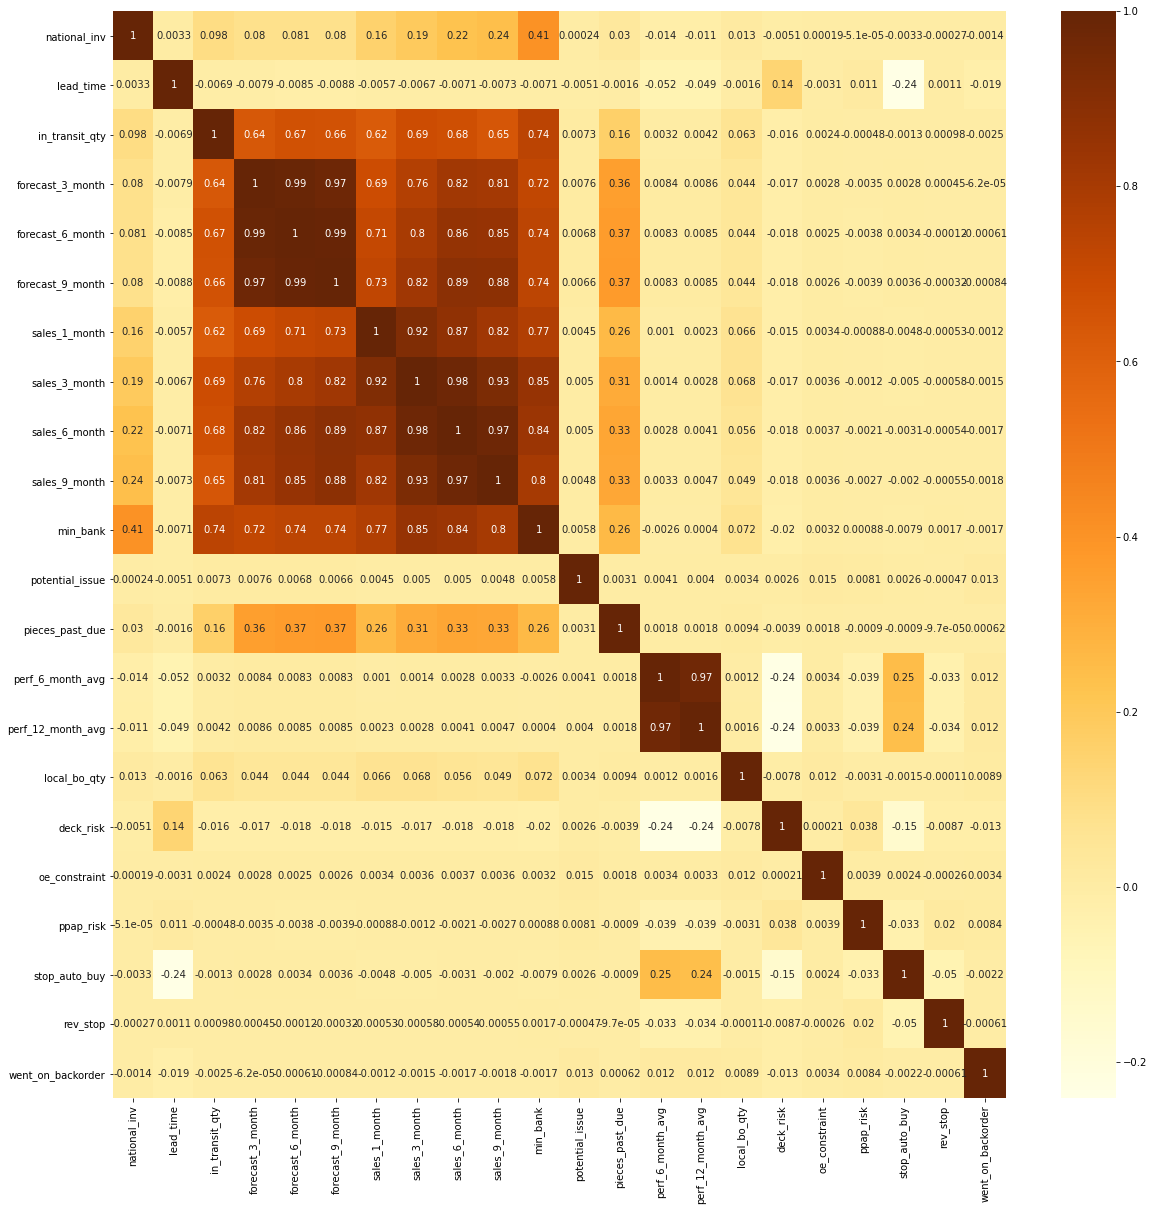

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(backorder_df.corr(), annot=True,  cmap="YlOrBr")
plt.plot()

As we disscussed before that the forecast sales features are highly correlated. so, we can drop two of them.

And  the sales quantity features are also highly correlated. so we can drop two of them

And source performance also having this issue. so, we can remove one of them


### 3. Feature selection

##### From the above obersations

1. Sku is random id generated for product. so we can ignore this

2. Due to high inter correlations, 2 of the forecast features and 3 of the sales features and 1 of the performance feature 
   will be ignored
   
3. The features pieces_past_due, local_bo_qty having more than 95 % of zero values. It may create high bias.
   so they can also removed

In [9]:
features = ['national_inv', 'lead_time', 'in_transit_qty','forecast_3_month', 'sales_1_month', 'min_bank', 'potential_issue',
           'perf_6_month_avg', 'deck_risk','oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']

In [10]:
#assigning the independent and dependent variable
x = backorder_df[features]
y = backorder_df['went_on_backorder']

### 4. Handling Imbalanced Data

As we discussed before that the binary data in the target variable should be balanced in the classification problem.

The value count of the  minority class should be atleast 25 % or greater. This is called the Balanced data.

but, the value count of minority class in the target variable (went_on_backorder) is only 0.72 %.

So, we have to balance the data.

### Oversampling with SMOTE

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
over_sample = SMOTE()
x_smo, y_smo = over_sample.fit_resample(x,y)
print('The shape of the oversampled data :', (x_smo.shape, y_smo.shape))

The shape of the oversampled data : ((3831912, 13), (3831912,))


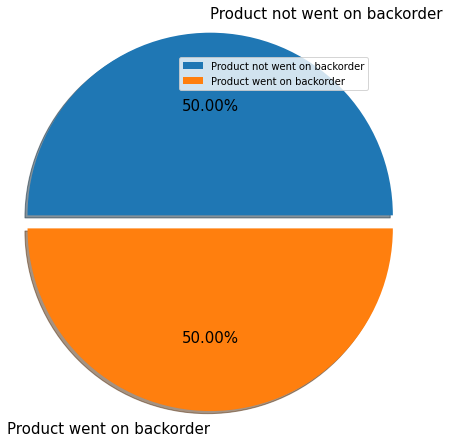

In [45]:
plt.figure()
plt.pie(y_smo.value_counts(), autopct='%.2f%%',
        labels=['Product not went on backorder','Product went on backorder'], explode=[0,0.1],
        radius=1.4, shadow=True, textprops= {'fontsize' : 15})
plt.legend()
plt.show()

Over sampling is sucessfully completed

### 5. Splitting the data 

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smo, y_smo, test_size=0.2, random_state=22)
print('The shape of training set :', (x_train.shape, y_train.shape))
print('The shape of test set :', (x_test.shape, y_test.shape))

The shape of training set : ((3065529, 13), (3065529,))
The shape of test set : ((766383, 13), (766383,))


### 6. Feature Scaling 

we can observe from the data that the range of the features are differ from one another.

In order to get the values of the data with mean = 0 and standard deviation = 1 , we can scale the data by using standardization technique.

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train_sc = sc_x.fit_transform(x_train)
x_test_sc = sc_x.transform(x_test)

so far, the preprocessing steps are completed

### Model Building

### 1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train_sc, y_train)
y_pred1 = model1.predict(x_test_sc)
train_pred1 = model1.predict(x_train_sc)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score

### Validating the model performance

In [17]:
#training set validation
print('Validation for training set :-', end='\n\n')
print('Accuracy score :', accuracy_score(y_train,train_pred1), end='\n\n')
print('Confusion matrix : \n', confusion_matrix(y_train,train_pred1), end='\n\n')
print('Classification report : \n', classification_report(y_train,train_pred1))
train_pred_proba1 = model1.predict_proba(x_train_sc)
print('F1 Score :', f1_score(y_train,train_pred1), end='\n\n')
print('AUC Score :', roc_auc_score(y_train,train_pred_proba1[:,1]))

Validation for training set :-

Accuracy score : 0.6799563794699055

Confusion matrix : 
 [[ 887071  646194]
 [ 334909 1197355]]

Classification report : 
               precision    recall  f1-score   support

           0       0.73      0.58      0.64   1533265
           1       0.65      0.78      0.71   1532264

    accuracy                           0.68   3065529
   macro avg       0.69      0.68      0.68   3065529
weighted avg       0.69      0.68      0.68   3065529

F1 Score : 0.7093728236724014

AUC Score : 0.7795280497171606


In [18]:
#testing set validation
print('Validation for test set :-', end='\n\n')
print('Accuracy score :', accuracy_score(y_test,y_pred1), end='\n\n')
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred1), end='\n\n')
print('Classification report : \n', classification_report(y_test,y_pred1))
y_pred_proba1 = model1.predict_proba(x_test_sc)
print('F1 Score :', f1_score(y_test,y_pred1), end='\n\n')
print('AUC Score :', roc_auc_score(y_test,y_pred_proba1[:,1]))

Validation for test set :-

Accuracy score : 0.6798102254355851

Confusion matrix : 
 [[221615 161076]
 [ 84312 299380]]

Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.58      0.64    382691
           1       0.65      0.78      0.71    383692

    accuracy                           0.68    766383
   macro avg       0.69      0.68      0.68    766383
weighted avg       0.69      0.68      0.68    766383

F1 Score : 0.7093068987902597

AUC Score : 0.7798039378384122


### ROC Curve

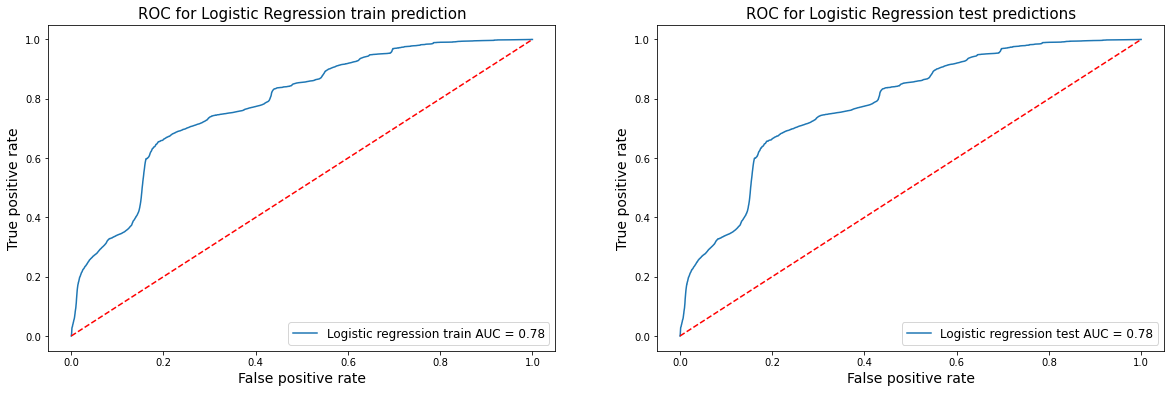

In [143]:
AUC_train1 = roc_auc_score(y_train,train_pred_proba1[:,1])
fpr_train_1, tpr_train_1, _ = roc_curve(y_train,train_pred_proba1[:,1])

plt.subplot(1,2,1)
plt.plot(fpr_train_1,tpr_train_1, label='Logistic regression train AUC = %0.2f' % AUC_train1)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC for Logistic Regression train prediction', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

AUC1 = roc_auc_score(y_test, y_pred_proba1[:,1])
fpr_1, tpr_1, _ = roc_curve(y_test, y_pred_proba1[:,1])

plt.subplot(1,2,2)
plt.plot(fpr_1,tpr_1, label='Logistic regression test AUC = %0.2f' % AUC1)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC for Logistic Regression test predictions', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

plt.show()

##### The decision tree and ensemble algorithms are not sensitive to the variance in the data.

##### so, we don't need to scale our data for building a model with desicion tree and ensemble algorithms such as Random forest,ada boost, gradient boosting, xgboost

##### I ignored the scaling part 

### 2. Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=2)
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
train_pred2 = model2.predict(x_train)

### Validating the model performance

In [161]:
#training set validation
print('Validation for training set :-', end='\n\n')
print('Accuracy score :', accuracy_score(y_train,train_pred2), end='\n\n')
print('Confusion matrix : \n', confusion_matrix(y_train,train_pred2), end='\n\n')
print('Classification report : \n', classification_report(y_train,train_pred2))
train_pred_proba2 = model2.predict_proba(x_train)
print('F1 Score :', f1_score(y_train,train_pred2), end='\n\n')
print('AUC Score :', roc_auc_score(y_train,train_pred_proba2[:,1]))

Validation for training set :-

Accuracy score : 0.9913313493364441

Confusion matrix : 
 [[1519761   13504]
 [  13070 1519194]]

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99   1533265
           1       0.99      0.99      0.99   1532264

    accuracy                           0.99   3065529
   macro avg       0.99      0.99      0.99   3065529
weighted avg       0.99      0.99      0.99   3065529

F1 Score : 0.9913297456868959

AUC Score : 0.9997661287441806


In [162]:
#testing set validation
print('Validation for test set :-', end='\n\n')
print('Accuracy score :', accuracy_score(y_test,y_pred2), end='\n\n')
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred2), end='\n\n')
print('Classification report : \n', classification_report(y_test,y_pred2))
y_pred_proba2 = model2.predict_proba(x_test)
print('F1 Score :', f1_score(y_test,y_pred2), end='\n\n')
print('AUC Score :', roc_auc_score(y_test,y_pred_proba2[:,1]))

Validation for test set :-

Accuracy score : 0.9835565246097577

Confusion matrix : 
 [[376514   6177]
 [  6425 377267]]

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    382691
           1       0.98      0.98      0.98    383692

    accuracy                           0.98    766383
   macro avg       0.98      0.98      0.98    766383
weighted avg       0.98      0.98      0.98    766383

F1 Score : 0.9835726650815502

AUC Score : 0.9913899028179731


### ROC Curve

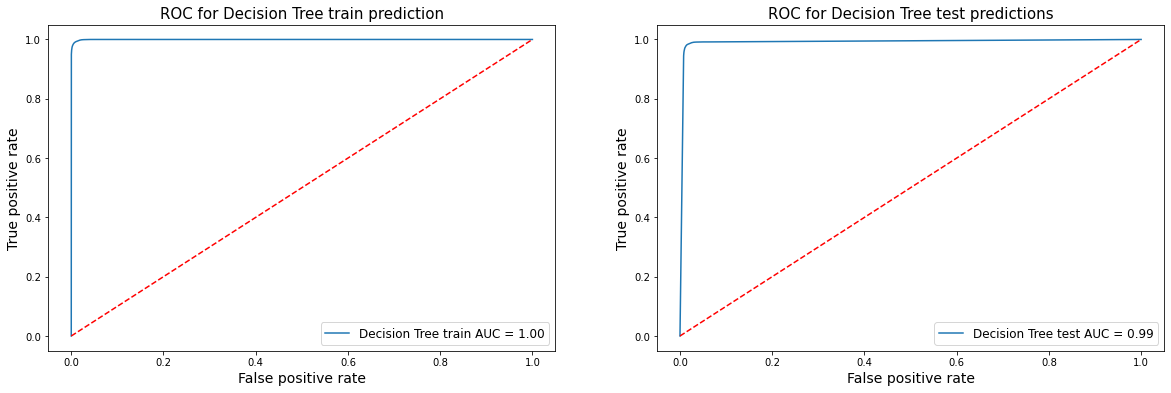

In [144]:
AUC_train2 = roc_auc_score(y_train,train_pred_proba2[:,1])
fpr_train_2, tpr_train_2, _ = roc_curve(y_train,train_pred_proba2[:,1])

plt.subplot(1,2,1)
plt.plot(fpr_train_2,tpr_train_2, label='Decision Tree train AUC = %0.2f' % AUC_train2)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC for Decision Tree train prediction', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

AUC2 = roc_auc_score(y_test,y_pred_proba2[:,1])
fpr_2, tpr_2, _ = roc_curve(y_test,y_pred_proba2[:,1])

plt.subplot(1,2,2)
plt.plot(fpr_2,tpr_2, label='Decision Tree test AUC = %0.2f' % AUC2)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC for Decision Tree test predictions', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

plt.show()

### 3. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=33)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
train_pred3 = model3.predict(x_train)

### Validating the model performance

In [20]:
#training set validation
print('Validation for training set :-', end='\n\n')
print('Accuracy score :', accuracy_score(y_train,train_pred3), end='\n\n')
print('Confusion matrix : \n', confusion_matrix(y_train,train_pred3), end='\n\n')
print('Classification report : \n', classification_report(y_train,train_pred3))
train_pred_proba3 = model3.predict_proba(x_train)
print('F1 Score :', f1_score(y_train,train_pred3), end='\n\n')
print('AUC Score :', roc_auc_score(y_train,train_pred_proba3[:,1]))

Validation for training set :-

Accuracy score : 0.9913430928234572

Confusion matrix : 
 [[1519520   13745]
 [  12793 1519471]]

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99   1533265
           1       0.99      0.99      0.99   1532264

    accuracy                           0.99   3065529
   macro avg       0.99      0.99      0.99   3065529
weighted avg       0.99      0.99      0.99   3065529

F1 Score : 0.9913429544475906

AUC Score : 0.9996838980920202


In [21]:
#testing set validation
print('Validation for test set :-', end='\n\n')
print('Accuracy score :', accuracy_score(y_test,y_pred3), end='\n\n')
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred3), end='\n\n')
print('Classification report : \n', classification_report(y_test,y_pred3))
y_pred_proba3 = model3.predict_proba(x_test)
print('F1 Score :', f1_score(y_test,y_pred3), end='\n\n')
print('AUC Score :', roc_auc_score(y_test,y_pred_proba3[:,1]))

Validation for test set :-

Accuracy score : 0.9864428099266294

Confusion matrix : 
 [[377751   4940]
 [  5450 378242]]

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    382691
           1       0.99      0.99      0.99    383692

    accuracy                           0.99    766383
   macro avg       0.99      0.99      0.99    766383
weighted avg       0.99      0.99      0.99    766383

F1 Score : 0.9864514900752926

AUC Score : 0.9987695519574656


### ROC Curve

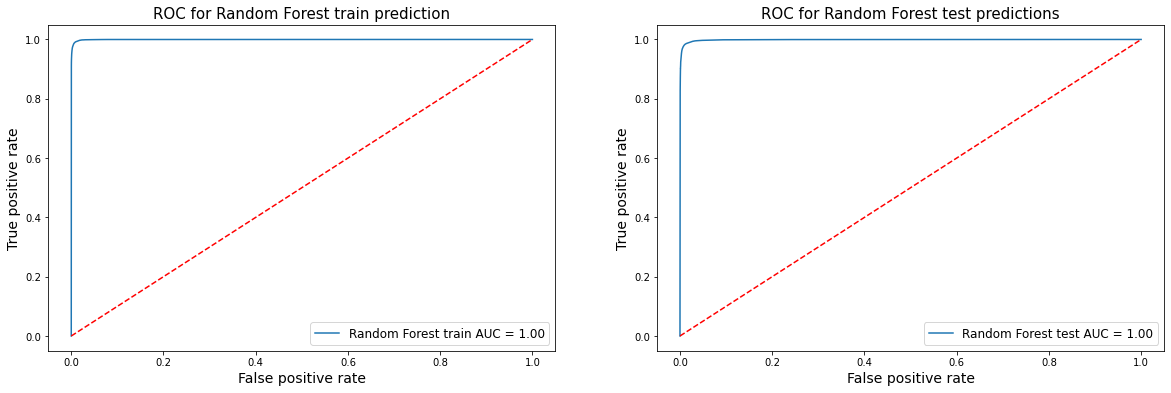

In [145]:
AUC_train3 = roc_auc_score(y_train,train_pred_proba3[:,1])
fpr_train_3, tpr_train_3, _ = roc_curve(y_train,train_pred_proba3[:,1])

plt.subplot(1,2,1)
plt.plot(fpr_train_3,tpr_train_3, label='Random Forest train AUC = %0.2f' % AUC_train3)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC for Random Forest train prediction', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

AUC3 = roc_auc_score(y_test,y_pred_proba3[:,1])
fpr_3, tpr_3, _ = roc_curve(y_test,y_pred_proba3[:,1])

plt.subplot(1,2,2)
plt.plot(fpr_3,tpr_3, label='Random Forest test AUC = %0.2f' % AUC3)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC for Random Forest test predictions', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

plt.show()

### 4. Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=12, n_estimators=200)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
train_pred4 = model4.predict(x_train)

### Validating the model performance

In [165]:
#training set validation
print('Validation for training set :-', end='\n\n')
print('Accuracy score :', accuracy_score(y_train,train_pred4), end='\n\n')
print('Confusion matrix : \n', confusion_matrix(y_train,train_pred4), end='\n\n')
print('Classification report : \n', classification_report(y_train,train_pred4))
train_pred_proba4 = model4.predict_proba(x_train)
print('F1 Score :', f1_score(y_train,train_pred4), end='\n\n')
print('AUC Score :', roc_auc_score(y_train,train_pred_proba4[:,1]))

Validation for training set :-

Accuracy score : 0.9086695966666765

Confusion matrix : 
 [[1371277  161988]
 [ 117988 1414276]]

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91   1533265
           1       0.90      0.92      0.91   1532264

    accuracy                           0.91   3065529
   macro avg       0.91      0.91      0.91   3065529
weighted avg       0.91      0.91      0.91   3065529

F1 Score : 0.9099329328865624

AUC Score : 0.9688891649216053


In [166]:
#testing set validation
print('Validation for test set :-', end='\n\n')
print('Accuracy score :', accuracy_score(y_test,y_pred4), end='\n\n')
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred4), end='\n\n')
print('Classification report : \n', classification_report(y_test,y_pred4))
y_pred_proba4 = model4.predict_proba(x_test)
print('F1 Score :', f1_score(y_test,y_pred4), end='\n\n')
print('AUC Score :', roc_auc_score(y_test,y_pred_proba4[:,1]))

Validation for test set :-

Accuracy score : 0.9086083590058757

Confusion matrix : 
 [[342076  40615]
 [ 29426 354266]]

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.89      0.91    382691
           1       0.90      0.92      0.91    383692

    accuracy                           0.91    766383
   macro avg       0.91      0.91      0.91    766383
weighted avg       0.91      0.91      0.91    766383

F1 Score : 0.9100392641409348

AUC Score : 0.9689702333025253


### ROC Curve

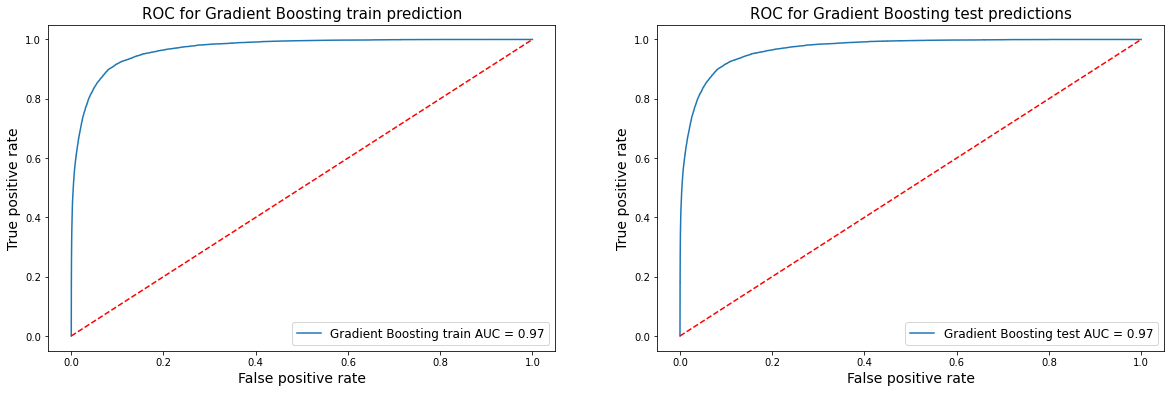

In [146]:
AUC_train4 = roc_auc_score(y_train,train_pred_proba4[:,1])
fpr_train_4, tpr_train_4, _ = roc_curve(y_train,train_pred_proba4[:,1])

plt.subplot(1,2,1)
plt.plot(fpr_train_4,tpr_train_4, label='Gradient Boosting train AUC = %0.2f' % AUC_train4)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC for Gradient Boosting train prediction', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

AUC4 = roc_auc_score(y_test,y_pred_proba4[:,1])
fpr_4, tpr_4, _ = roc_curve(y_test,y_pred_proba4[:,1])

plt.subplot(1,2,2)
plt.plot(fpr_4,tpr_4, label='Gradient Boosting test AUC = %0.2f' % AUC4)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC for Gradient Boosting test predictions', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

plt.show()

### 5. Ada Boost

In [96]:
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier(n_estimators=100, random_state=5)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
train_pred5 = model5.predict(x_train)

### Validating the model performance

In [167]:
#training set validation
print('Validation for training set :-', end='\n\n')
print('Accuracy score :', accuracy_score(y_train,train_pred5), end='\n\n')
print('Confusion matrix : \n', confusion_matrix(y_train,train_pred5), end='\n\n')
print('Classification report : \n', classification_report(y_train,train_pred5))
train_pred_proba5 = model5.predict_proba(x_train)
print('F1 Score :', f1_score(y_train,train_pred5), end='\n\n')
print('AUC Score :', roc_auc_score(y_train,train_pred_proba5[:,1]))

Validation for training set :-

Accuracy score : 0.8623692680773857

Confusion matrix : 
 [[1312140  221125]
 [ 200786 1331478]]

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86   1533265
           1       0.86      0.87      0.86   1532264

    accuracy                           0.86   3065529
   macro avg       0.86      0.86      0.86   3065529
weighted avg       0.86      0.86      0.86   3065529

F1 Score : 0.863232029127998

AUC Score : 0.9282293046832205


In [168]:
#testing set validation
print('Validation for test set :-', end='\n\n')
print('Accuracy score :', accuracy_score(y_test,y_pred5), end='\n\n')
print('Confusion matrix : \n', confusion_matrix(y_test,y_pred5), end='\n\n')
print('Classification report : \n', classification_report(y_test,y_pred5))
y_pred_proba5 = model5.predict_proba(x_test)
print('F1 Score :', f1_score(y_test,y_pred5), end='\n\n')
print('AUC Score :', roc_auc_score(y_test,y_pred_proba5[:,1]))

Validation for test set :-

Accuracy score : 0.8626274330197825

Confusion matrix : 
 [[327400  55291]
 [ 49989 333703]]

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86    382691
           1       0.86      0.87      0.86    383692

    accuracy                           0.86    766383
   macro avg       0.86      0.86      0.86    766383
weighted avg       0.86      0.86      0.86    766383

F1 Score : 0.863748016658772

AUC Score : 0.9284758325758958


### ROC Curve

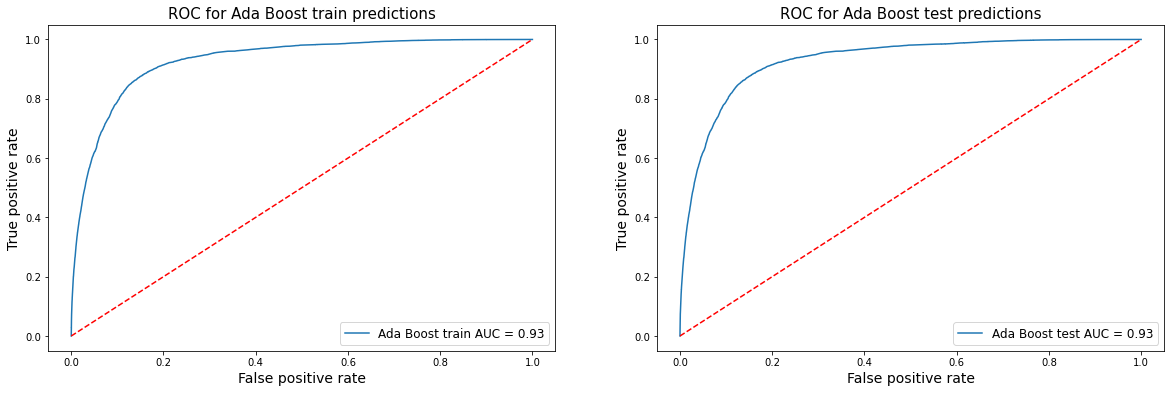

In [147]:
AUC_train5 = roc_auc_score(y_train,train_pred_proba5[:,1])
fpr_train_5, tpr_train_5, _ = roc_curve(y_train,train_pred_proba5[:,1])

plt.subplot(1,2,1)
plt.plot(fpr_train_5,tpr_train_5, label='Ada Boost train AUC = %0.2f' % AUC_train5)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC for Ada Boost train predictions', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

AUC5 = roc_auc_score(y_test,y_pred_proba5[:,1])
fpr_5, tpr_5, _ = roc_curve(y_test,y_pred_proba5[:,1])

plt.subplot(1,2,2)
plt.plot(fpr_5,tpr_5, label='Ada Boost test AUC = %0.2f' % AUC5)
plt.plot([0,1],[0,1],'r--')
plt.title('ROC for Ada Boost test predictions', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

plt.show()

### Comparing the model

In [184]:
model1 = ['Logistic Regression', round(0.6833293535999624,2)*100, round(0.7123133731233591,4), 
          round(0.782961999992376,4)]
model2 = ['Decision Tree Classifier', round(0.9913313493364441,2)*100, round(0.9835726650815502,4), 
          round(0.9997661287441806,4)]
model3 = ['Random Forest Classifier', round(0.9835565246097577,2)*100, round(0.9913291724321049,4), 
          round(0.9996702011865299,4)]
model4 = ['Gradient Boosting Classifier', round(0.9086083590058757,2)*100, round(0.9100392641409348,4), 
          round(0.9688891649216053,4)]
model5 = ['Ada Boost Classifier', round(0.8623692680773857,2)*100, round(0.863232029127998,4), 
          round(0.9282293046832205,4)]

In [189]:
summary = pd.DataFrame([model1, model2, model3, model4, model5], columns=['Models', 'Accuracy', 'F1 Score', 'AUC Score'],
                       index= [1,2,3,4,5])

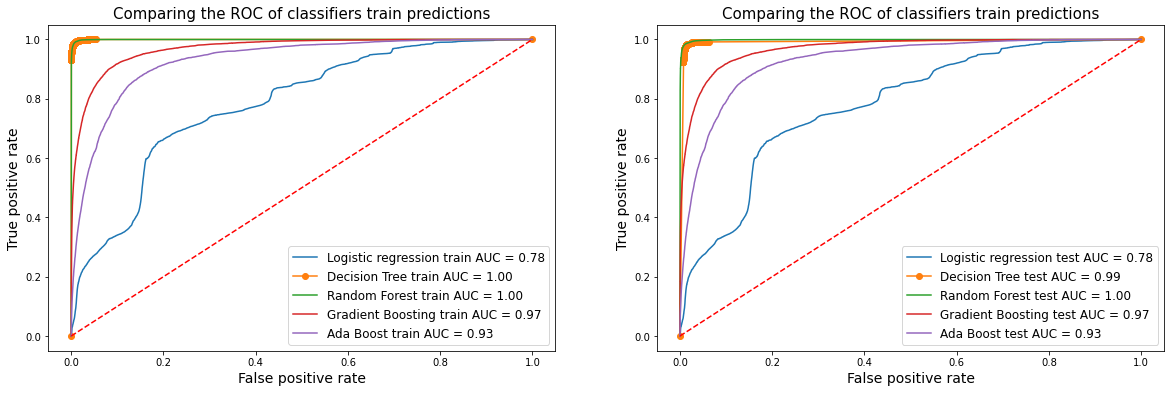

In [156]:
plt.subplot(1,2,1)
plt.plot(fpr_train_1,tpr_train_1, label='Logistic regression train AUC = %0.2f' % AUC_train1)
plt.plot(fpr_train_2,tpr_train_2, marker='o', label='Decision Tree train AUC = %0.2f' % AUC_train2)
plt.plot(fpr_train_3,tpr_train_3, label='Random Forest train AUC = %0.2f' % AUC_train3)
plt.plot(fpr_train_4,tpr_train_4, label='Gradient Boosting train AUC = %0.2f' % AUC_train4)
plt.plot(fpr_train_5,tpr_train_5, label='Ada Boost train AUC = %0.2f' % AUC_train5)
plt.plot([0,1],[0,1],'r--')
plt.title('Comparing the ROC of classifiers train predictions', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

plt.subplot(1,2,2)
plt.plot(fpr_1,tpr_1, label='Logistic regression test AUC = %0.2f' % AUC1)
plt.plot(fpr_2,tpr_2, marker='o', label='Decision Tree test AUC = %0.2f' % AUC2)
plt.plot(fpr_3,tpr_3, label='Random Forest test AUC = %0.2f' % AUC3)
plt.plot(fpr_4,tpr_4, label='Gradient Boosting test AUC = %0.2f' % AUC4)
plt.plot(fpr_5,tpr_5, label='Ada Boost test AUC = %0.2f' % AUC5)
plt.plot([0,1],[0,1],'r--')
plt.title('Comparing the ROC of classifiers train predictions', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 14)
plt.ylabel('True positive rate', fontsize = 14)
plt.legend(loc= 'lower right', prop={'size':12})

plt.show()

In [190]:
summary

,Models,Accuracy,F1 Score,AUC Score
1,Logistic Regression,68.0,0.7123,0.7830
2,Decision Tree Classifier,99.0,0.9836,0.9998
3,Random Forest Classifier,98.0,0.9913,0.9997
4,Gradient Boosting Classifier,91.0,0.9100,0.9689
5,Ada Boost Classifier,86.0,0.8632,0.9282


### Conclusion

So far, the Back order prediction problem is completed.

In this problem, I started with eda and based on the insights of the eda, the data was preprocessed.

After that I build a different supervised machine learning classification algorithms like Logistic regression, Decision tree,
Random forest, Gradient boosting and Ada boost in order to predict whether the product will be purchased again or not.

Apart from Logistic regression, all the models gave a good accuracy, f1 score and auc score.

In that, the Random forest and the decision tree are the best model with the difference of of accuracy of 1 % , f1 score of 0.01 % and auc score of 0.001 %.


we can use any of them for deployement.

### Dumping the model

In order to save our trained RandomForestClassifier model to the pc, using pickle library

In [22]:
import pickle 

In [23]:
pickle.dump(model3, open('model_rf.pkl','wb'))